In [14]:
from lib import *
import pandas as pd
import matplotlib.pyplot as plt

pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')


#dfs = load_data_bq()
dfs = load_data_db()
df = dfs["sequential_contracts"]
#39s

Conexão estabelecida com sucesso!


In [15]:
df = df.sort_values("contratos_consecutivos", ascending=False)
df["fim_periodo"] = pd.to_datetime(df["fim_periodo"])
df["inicio_periodo"] = pd.to_datetime(df["inicio_periodo"])
df = df.dropna(axis=0)
df["media_dias_por_contrato"] = df["media_dias_por_contrato"].astype(float)

In [16]:
display(df.sort_values("total_dias_agenciados", ascending=False).head(5))

,driver_id,company_id,inicio_periodo,fim_periodo,total_dias_agenciados,total_price,contratos_consecutivos,media_dias_por_contrato
1364,9955.0,229,2022-02-17 07:30:00,2024-12-27 00:00:00,842,230676,19,44.315789
3882,28030.0,249,2022-09-13 10:00:00,2025-03-07 00:00:00,793,218222,19,41.736842
1882,12380.0,229,2022-02-17 15:23:43,2025-03-08 00:00:00,742,228465,36,20.611111
4300,32309.0,249,2022-12-09 13:30:00,2025-01-18 12:00:00,679,186117,13,52.230769
6836,73728.0,159,2023-06-07 08:00:00,2025-03-10 07:30:00,628,193480,24,26.166667


In [17]:
print("GERAL")
display(df.describe().transpose())

GERAL


,count,mean,min,25%,50%,75%,max,std
driver_id,9657.0,63851.948224,7.0,15285.0,38527.0,92316.0,333782.0,67103.2547
company_id,9657.0,918.703531,5.0,229.0,511.0,1356.0,4034.0,938.728176
inicio_periodo,9657,2023-12-01 21:49:32.278761216,2020-02-19 17:00:00,2023-04-05 15:30:00,2024-02-19 00:00:00,2024-09-24 12:00:00,2025-03-02 17:30:00,NaN
fim_periodo,9657,2024-02-11 21:28:59.391322368,2020-03-16 22:30:00,2023-07-04 22:00:00,2024-05-05 13:00:00,2024-12-13 11:00:00,2025-04-06 20:00:00,NaN
total_dias_agenciados,9657.0,51.196956,2.0,14.0,34.0,65.0,842.0,59.461355
total_price,9657.0,15287.285389,180.0,3780.0,9660.0,19530.0,230676.0,18341.588758
contratos_consecutivos,9657.0,4.228228,2.0,2.0,3.0,4.0,292.0,6.239697
media_dias_por_contrato,9657.0,13.482265,1.0,4.5,11.222222,19.833333,121.5,10.919638


In [18]:
# 17132 motorista tem pelo menos 2 contratos sequenciais com o mesmo cliente
# Destes 50 % tem até 48 dias agenciados
# Entre os que tem mais de 48 dias agenciados foram 4308 ocorrencias

more_than_N_days
True     6496
False    4717
Name: count, dtype: int64


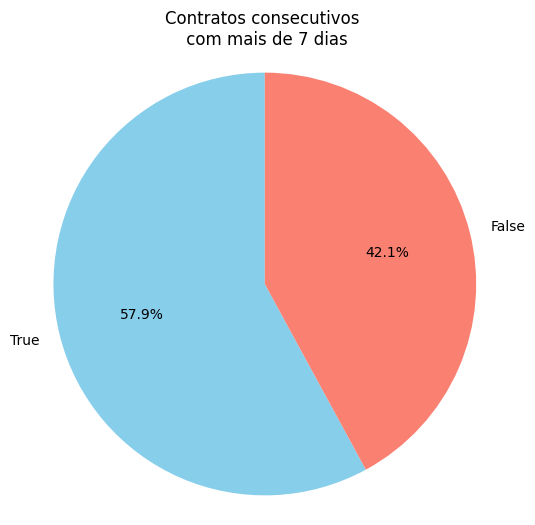

In [19]:
N = 7
df = dfs["sequential_contracts"].copy()
df["more_than_N_days"] = df["media_dias_por_contrato"] > N

import pandas as pd
import matplotlib.pyplot as plt

# Exemplo: assumindo que o DataFrame 'df' já está definido

# Conta a quantidade de True e False na coluna 'more_than_N_days'
contagem = df["more_than_N_days"].value_counts()
contagem = contagem.sort_index(ascending=False)
# Exibe a contagem (opcional)
print(contagem)

# Cria o gráfico de pizza com porcentagens
plt.figure(figsize=(6,6))
plt.pie(contagem, 
        labels=contagem.index, 
        autopct='%1.1f%%', 
        colors=["skyblue", "salmon"],
        startangle=90)
plt.title(f"Contratos consecutivos \n com mais de {N} dias")
plt.axis('equal')  # Garante que o gráfico seja desenhado como um círculo
plt.show()


more_than_N_days
True     3681
False    7532
Name: count, dtype: int64


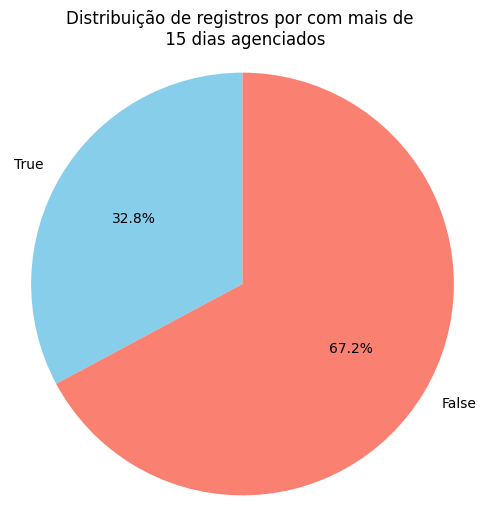

In [20]:
N = 15
df = dfs["sequential_contracts"].copy()
df["more_than_N_days"] = df["media_dias_por_contrato"] > N

import pandas as pd
import matplotlib.pyplot as plt

# Exemplo: assumindo que o DataFrame 'df' já está definido

# Conta a quantidade de True e False na coluna 'more_than_N_days'
contagem = df["more_than_N_days"].value_counts()
contagem = contagem.sort_index(ascending=False)
# Exibe a contagem (opcional)
print(contagem)

# Cria o gráfico de pizza com porcentagens
plt.figure(figsize=(6,6))
plt.pie(contagem, 
        labels=contagem.index, 
        autopct='%1.1f%%', 
        colors=["skyblue", "salmon"],
        startangle=90)
plt.title(f"Distribuição de registros por com mais de \n {N} dias agenciados")
plt.axis('equal')  # Garante que o gráfico seja desenhado como um círculo
plt.show()


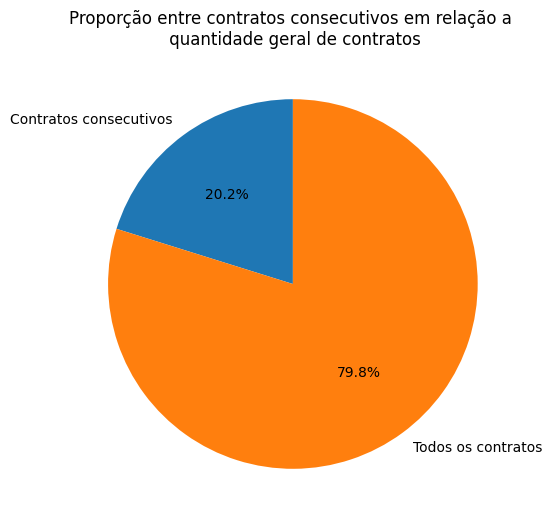

In [21]:
import matplotlib.pyplot as plt

df = dfs["sequential_contracts"].copy()

# Supondo que o DataFrame 'df' já esteja definido
valor_df = df.shape[0]
valor_total = dfs["all_contracts"].shape[0]
valor_restante = valor_total - valor_df

# Dados para o gráfico de pizza
labels = ['Contratos consecutivos', 'Todos os contratos']
sizes = [valor_df, valor_restante]

# Cria o gráfico de pizza
plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title(f'Proporção entre contratos consecutivos em relação a \n quantidade geral de contratos')
plt.show()


more_than_N_days
True     25459
False    30121
Name: count, dtype: int64


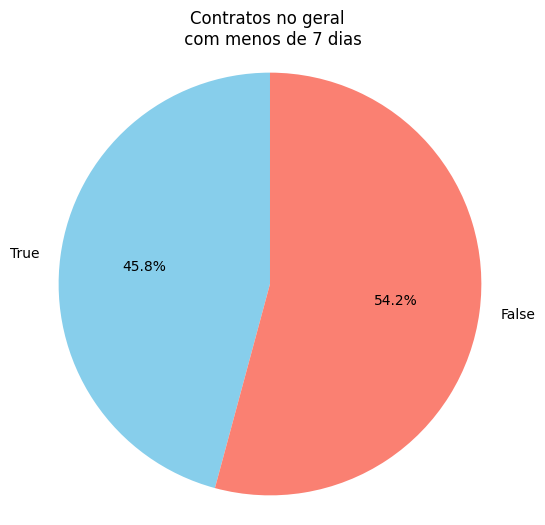

In [22]:
N = 7
df = dfs["all_contracts"].copy()
df["more_than_N_days"] = df["contract_days"] <  N

import pandas as pd
import matplotlib.pyplot as plt

# Exemplo: assumindo que o DataFrame 'df' já está definido

# Conta a quantidade de True e False na coluna 'more_than_N_days'
contagem = df["more_than_N_days"].value_counts()
contagem = contagem.sort_index(ascending=False)
# Exibe a contagem (opcional)
print(contagem)

# Cria o gráfico de pizza com porcentagens
plt.figure(figsize=(6,6))
plt.pie(contagem, 
        labels=contagem.index, 
        autopct='%1.1f%%', 
        colors=["skyblue", "salmon"],
        startangle=90)
plt.title(f"Contratos no geral \n com menos de {N} dias")
plt.axis('equal')  # Garante que o gráfico seja desenhado como um círculo
plt.show()


more_than_N_days
True     14237
False    41343
Name: count, dtype: int64


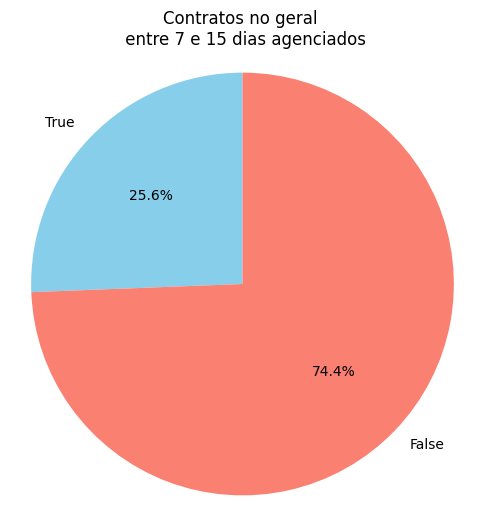

In [23]:

df = dfs["all_contracts"].copy()
df["more_than_N_days"] = (df["contract_days"] >= 7) & (df["contract_days"] <= 15)
 
import pandas as pd
import matplotlib.pyplot as plt

# Exemplo: assumindo que o DataFrame 'df' já está definido

# Conta a quantidade de True e False na coluna 'more_than_N_days'
contagem = df["more_than_N_days"].value_counts()
contagem = contagem.sort_index(ascending=False)
# Exibe a contagem (opcional)
print(contagem)

# Cria o gráfico de pizza com porcentagens
plt.figure(figsize=(6,6))
plt.pie(contagem, 
        labels=contagem.index, 
        autopct='%1.1f%%', 
        colors=["skyblue", "salmon"],
        startangle=90)
plt.title(f"Contratos no geral \n entre 7 e 15 dias agenciados")
plt.axis('equal')  # Garante que o gráfico seja desenhado como um círculo
plt.show()


more_than_N_days
True     15884
False    39696
Name: count, dtype: int64


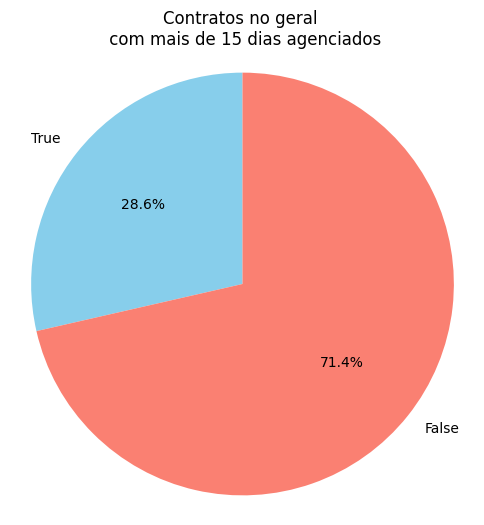

In [24]:

df = dfs["all_contracts"].copy()
df["more_than_N_days"] = (df["contract_days"] >  15)
 
import pandas as pd
import matplotlib.pyplot as plt

# Exemplo: assumindo que o DataFrame 'df' já está definido

# Conta a quantidade de True e False na coluna 'more_than_N_days'
contagem = df["more_than_N_days"].value_counts()
contagem = contagem.sort_index(ascending=False)
# Exibe a contagem (opcional)
print(contagem)

# Cria o gráfico de pizza com porcentagens
plt.figure(figsize=(6,6))
plt.pie(contagem, 
        labels=contagem.index, 
        autopct='%1.1f%%', 
        colors=["skyblue", "salmon"],
        startangle=90)
plt.title(f"Contratos no geral \n com mais de 15 dias agenciados")
plt.axis('equal')  # Garante que o gráfico seja desenhado como um círculo
plt.show()
